In [1]:
import os

class OutputExtractor:
    def __init__(self, fileName:str, rankSize: int):
        # Initializae All Setting
        self.fileName = fileName
        self.rankSize = rankSize
        
        # Extract File Raw Material
        with open(self.fileName, "r") as tf:
            self.rawLines = tf.readlines()

        # Preprocessing Result
        self.data = []
        lines = list(map(lambda x: x.strip("[\n")[:-5], self.rawLines))
        lines = list(map(lambda x: x.split("]"), lines))

        for i in range(self.rankSize):
            # Get Rank Information
            self.data.append({})

            for j in range(len(lines)):
                if int(lines[j][0]) == i:
                    tmp = lines[j][1].split(":")
                    self.data[i][tmp[0]] = float(tmp[1])

        # Extract Keys
        self.types = list(self.data[0].keys())

    def extractType(self, typeName: str):
        # Extract All Ranks' Specific Type Information.
        result = []
        if typeName not in self.types: return result
        for i in range(self.rankSize):
            result.append({
                "rank": i,
                "type": typeName,
                "value": self.data[i][typeName]
            })

        return result

    def extractRank(self, rank: int):
        # Extrack Specific Rank's All Information.
        return self.data[rank]
        
    def extractMax(self, typeName: str):
        # Extrack All Information Maxima(Bottle Neck).
        result = {
            "rank": 0,
            "value": 0,
            "type": typeName
        }
        for rank in range(self.rankSize):
            if self.data[rank][typeName] > result["value"]:
                result["value"] = self.data[rank][typeName]
                result["rank"] = rank

        return result

    def extractMaxMinAll(self):
        result = []

        for t in self.types:
            tmp = {
                "type": t,
                'max': float('-inf'),
                'min': float('inf')
            }

            for rank in range(self.rankSize):
                if self.data[rank][t] > tmp["max"]:
                    tmp["max"] = self.data[rank][t]
                if self.data[rank][t] < tmp["min"]:
                    tmp["min"] = self.data[rank][t]
            result.append(tmp)
        return result

    def __str__(self):
        tmp = ""
        for i in range(len(self.data)):
            tmp += f"rank: {i}\n"

            for key in self.data[i].keys():
                tmp += f"   {key}: {self.data[i][key]}\n"
        return tmp

# DATASET = {
#     "index": "27",
#     "n": "191121",
#     "fIn": "27.in",
#     "fOut": "27.out"
# }
DATASET = {
    "index": "35",
    "n": "536869888",
    "fIn": "35.in",
    "fOut": "35.out"
}
SEQUENCIALVIERSION = f"{DATASET['index']}-Sequencial.txt"

def getSingleCoreFileName(i: int):
    return DATASET["index"] + f"-SingleCore-{i}.txt"

def getMultipleCoreFileName(i: int):
    return DATASET["index"] + f"-MultiCore-{i}.txt"

def getSingleCoreFileNameFull(i: int):
    return DATASET["index"] + f"-SingleCore-{i}-Full.txt"

def getMultipleCoreFileNameFull(i: int):
    return DATASET["index"] + f"-MultiCore-{i}-Full.txt"

In [2]:
# Log out Sequencial Data
# sequential = OutputExtractor(f"logs/{SEQUENCIALVIERSION}", 1).extractMax("Full Program")
# print(str(sequential["value"]) + "(sec)")

In [3]:
import matplotlib.pyplot as plt

In [4]:
# SingleCore-MultipleProcess Version
singleCore = []
for i in range(12):
    tmp = OutputExtractor(f"logs/{getSingleCoreFileName(i)}", i+1).extractMax("Full Program")
    singleCore.append(tmp)
    print(f"Processes Count -> {i+1} {' ' if i+1 < 10 else ''}[{tmp['rank']}] {tmp['value']}(sec)")

Processes Count -> 1  [0] 79.45(sec)
Processes Count -> 2  [1] 47.4708(sec)
Processes Count -> 3  [1] 35.5993(sec)
Processes Count -> 4  [3] 34.6009(sec)
Processes Count -> 5  [3] 27.6743(sec)
Processes Count -> 6  [3] 23.0289(sec)
Processes Count -> 7  [5] 24.8903(sec)
Processes Count -> 8  [5] 20.3483(sec)
Processes Count -> 9  [1] 19.9206(sec)
Processes Count -> 10 [3] 19.0912(sec)
Processes Count -> 11 [5] 18.455(sec)
Processes Count -> 12 [11] 17.7708(sec)


In [5]:
# MultipleCore-SingleProcessForEach
multipleCore = []
for i in range(4):
    tmp = OutputExtractor(f"logs/{getMultipleCoreFileName(i)}", i+1).extractMax("Full Program")
    multipleCore.append(tmp)
    print(f"Node Count -> {i+1} {' ' if i+1 < 10 else ''}[{tmp['rank']}] {tmp['value']}(sec)")

Node Count -> 1  [0] 18.4201(sec)
Node Count -> 2  [1] 14.8408(sec)
Node Count -> 3  [1] 12.9817(sec)
Node Count -> 4  [0] 12.4593(sec)


In [6]:
singleCore

[{'rank': 0, 'value': 79.45, 'type': 'Full Program'},
 {'rank': 1, 'value': 47.4708, 'type': 'Full Program'},
 {'rank': 1, 'value': 35.5993, 'type': 'Full Program'},
 {'rank': 3, 'value': 34.6009, 'type': 'Full Program'},
 {'rank': 3, 'value': 27.6743, 'type': 'Full Program'},
 {'rank': 3, 'value': 23.0289, 'type': 'Full Program'},
 {'rank': 5, 'value': 24.8903, 'type': 'Full Program'},
 {'rank': 5, 'value': 20.3483, 'type': 'Full Program'},
 {'rank': 1, 'value': 19.9206, 'type': 'Full Program'},
 {'rank': 3, 'value': 19.0912, 'type': 'Full Program'},
 {'rank': 5, 'value': 18.455, 'type': 'Full Program'},
 {'rank': 11, 'value': 17.7708, 'type': 'Full Program'}]

In [7]:
multipleCore

[{'rank': 0, 'value': 18.4201, 'type': 'Full Program'},
 {'rank': 1, 'value': 14.8408, 'type': 'Full Program'},
 {'rank': 1, 'value': 12.9817, 'type': 'Full Program'},
 {'rank': 0, 'value': 12.4593, 'type': 'Full Program'}]

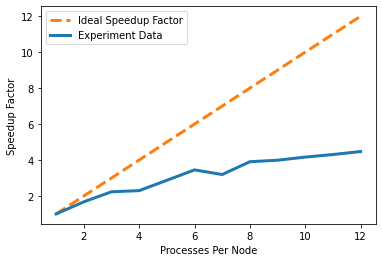

In [8]:
# Plot Single Core
# Create X Index
plt.plot(range(1, len(singleCore)+1), range(1, len(singleCore)+1), 'tab:orange', linestyle='--', linewidth='3.0')
plt.plot(range(1, len(singleCore)+1), [singleCore[0]['value'] / x['value'] for x in singleCore], 'tab:blue', linewidth='3.0')
plt.xlabel("Processes Per Node")
plt.ylabel("Speedup Factor")
plt.legend(["Ideal Speedup Factor", "Experiment Data"])
plt.show()

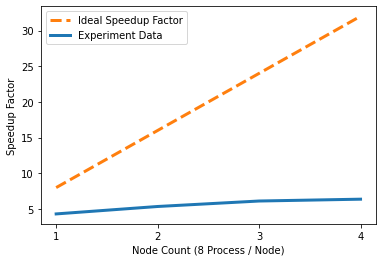

In [9]:
# MultipleCore Chart
# 8 Process Per Node
plt.plot(range(1, len(multipleCore)+1), range(8, 8*len(multipleCore)+1, 8), 'tab:orange', linestyle='--', linewidth='3.0')
plt.plot(range(1, len(multipleCore)+1), [singleCore[0]['value'] / x['value'] for x in multipleCore], linewidth='3.0')
plt.xticks(range(1, len(multipleCore)+1))
plt.xlabel("Node Count (8 Process / Node)")
plt.ylabel("Speedup Factor")
plt.legend(["Ideal Speedup Factor", "Experiment Data"])
plt.show()

In [10]:
# Set up Rank Stack Value
singleCoreFull = []
for i in range(12):
    tmp = OutputExtractor(f"logs/{getSingleCoreFileNameFull(i)}", i+1).extractMaxMinAll()
    singleCoreFull.append(tmp)
    print(tmp)

[{'type': 'Preprocessing Time', 'max': 76.9684, 'min': 76.9684}, {'type': 'MPIIO Time', 'max': 5.08603, 'min': 5.08603}, {'type': 'Communication Time', 'max': 2.1925e-05, 'min': 2.1925e-05}, {'type': 'Single Node Computation Time', 'max': 0.0, 'min': 0.0}, {'type': 'Total', 'max': 82.0544, 'min': 82.0544}]
[{'type': 'Preprocessing Time', 'max': 37.0257, 'min': 36.476}, {'type': 'MPIIO Time', 'max': 4.41821, 'min': 4.41508}, {'type': 'Communication Time', 'max': 2.62057, 'min': 2.06161}, {'type': 'Single Node Computation Time', 'max': 2.17138, 'min': 2.15945}, {'type': 'Total', 'max': 45.6769, 'min': 45.6711}]
[{'type': 'Preprocessing Time', 'max': 24.365, 'min': 24.2902}, {'type': 'MPIIO Time', 'max': 3.20633, 'min': 3.19741}, {'type': 'Communication Time', 'max': 6.36404, 'min': 4.04912}, {'type': 'Single Node Computation Time', 'max': 3.58079, 'min': 1.24074}, {'type': 'Total', 'max': 35.1772, 'min': 35.1685}]
[{'type': 'Preprocessing Time', 'max': 17.9061, 'min': 17.882}, {'type': '

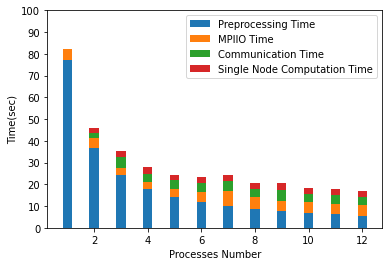

In [11]:
def extractCertainTypeMean(intype):
    return [list((x['min'] + x['max'])/2 for x in y if x['type'] == intype)[0] for y in singleCoreFull]

def extractCertainTypeDiff(intype):
    return [list((x['max'] - x['min'])/2 for x in y if x['type'] == intype)[0] for y in singleCoreFull]

fig, ax = plt.subplots()
width = 0.35
labels = list(range(1, 13))

pre_time = extractCertainTypeMean('Preprocessing Time')
mpi_time = [sum(x) for x in zip(extractCertainTypeMean('MPIIO Time'), pre_time)]
comm_time = [sum(x) for x in zip(extractCertainTypeMean('Communication Time'), mpi_time)]
single_time = [sum(x) for x in zip(extractCertainTypeMean('Single Node Computation Time'), comm_time)]

ax.bar(labels, extractCertainTypeMean('Preprocessing Time'), width, label='Preprocessing Time')
ax.bar(labels, extractCertainTypeMean('MPIIO Time'), width, label='MPIIO Time', bottom=pre_time)
ax.bar(labels, extractCertainTypeMean('Communication Time'), width, label='Communication Time', bottom=mpi_time)
ax.bar(labels, extractCertainTypeMean('Single Node Computation Time'), width, label='Single Node Computation Time', bottom=comm_time)

ax.set_ylabel('Time(sec)')
ax.set_xlabel('Processes Number')
ax.set_yticks(range(0, 101, 10))
ax.legend()

plt.show()

[{'type': 'Preprocessing Time', 'max': 8.63085, 'min': 8.54714}, {'type': 'MPIIO Time', 'max': 9.82862, 'min': 9.82208}, {'type': 'Communication Time', 'max': 4.5125, 'min': 3.10861}, {'type': 'Single Node Computation Time', 'max': 3.29014, 'min': 1.92204}, {'type': 'Total', 'max': 24.8225, 'min': 24.8098}]
[{'type': 'Preprocessing Time', 'max': 4.1443, 'min': 4.1114}, {'type': 'MPIIO Time', 'max': 7.17617, 'min': 7.17208}, {'type': 'Communication Time', 'max': 4.88228, 'min': 3.26254}, {'type': 'Single Node Computation Time', 'max': 3.43157, 'min': 1.8224}, {'type': 'Total', 'max': 17.9975, 'min': 17.993}]
[{'type': 'Preprocessing Time', 'max': 2.73842, 'min': 2.67083}, {'type': 'MPIIO Time', 'max': 3.38161, 'min': 3.37191}, {'type': 'Communication Time', 'max': 5.06326, 'min': 2.96084}, {'type': 'Single Node Computation Time', 'max': 3.55121, 'min': 1.39627}, {'type': 'Total', 'max': 12.5861, 'min': 12.5781}]
[{'type': 'Preprocessing Time', 'max': 1.98659, 'min': 1.97391}, {'type': '

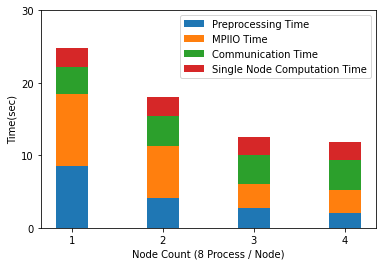

In [12]:
MultipleCoreFull = []

for i in range(4):
    tmp = OutputExtractor(f"logs/{getMultipleCoreFileNameFull(i)}", (i+1)*8).extractMaxMinAll()
    MultipleCoreFull.append(tmp)
    print(tmp)

def extractCertainTypeMeanMulti(intype):
    return [list((x['min'] + x['max'])/2 for x in y if x['type'] == intype)[0] for y in MultipleCoreFull]

fig, ax = plt.subplots()
width = 0.35
labels = list(range(1, 5))

pre_time = extractCertainTypeMeanMulti('Preprocessing Time')
mpi_time = [sum(x) for x in zip(extractCertainTypeMeanMulti('MPIIO Time'), pre_time)]
comm_time = [sum(x) for x in zip(extractCertainTypeMeanMulti('Communication Time'), mpi_time)]
single_time = [sum(x) for x in zip(extractCertainTypeMeanMulti('Single Node Computation Time'), comm_time)]

ax.bar(labels, extractCertainTypeMeanMulti('Preprocessing Time'), width, label='Preprocessing Time')
ax.bar(labels, extractCertainTypeMeanMulti('MPIIO Time'), width, label='MPIIO Time', bottom=pre_time)
ax.bar(labels, extractCertainTypeMeanMulti('Communication Time'), width, label='Communication Time', bottom=mpi_time)
ax.bar(labels, extractCertainTypeMeanMulti('Single Node Computation Time'), width, label='Single Node Computation Time', bottom=comm_time)

ax.set_ylabel('Time(sec)')
ax.set_xlabel('Node Count (8 Process / Node)')
ax.set_yticks(range(0, 31, 10))
ax.set_xticks(range(1, 5))
ax.legend()

plt.show()
